In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Import data

df = pd.read_csv(r"C:\Users\rbaue\Desktop\airbnb_clean.csv")


In [3]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1259 non-null   int64  
 1   name               1259 non-null   object 
 2   neighbourhood      1259 non-null   object 
 3   latitude           1259 non-null   float64
 4   longitude          1259 non-null   float64
 5   room_type          1259 non-null   object 
 6   property_type      1259 non-null   object 
 7   price              1259 non-null   int64  
 8   minimum_nights     1259 non-null   int64  
 9   number_of_reviews  1259 non-null   int64  
 10  reviews_per_month  1259 non-null   float64
 11  availability_365   1259 non-null   int64  
 12  host_is_superhost  1259 non-null   object 
 13  instant_bookable   1259 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 137.8+ KB


In [4]:
# Keep only the columns we need
df_reg = df[['number_of_reviews', 'price']]

# Drop any missing values just in case
df_reg = df_reg.dropna()

df_reg.head()


,number_of_reviews,price
0,868,128
1,342,112
2,82,105
3,87,253
4,283,74


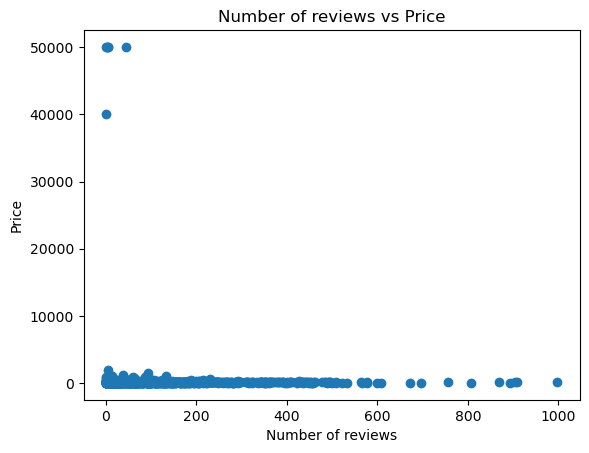

In [5]:
# Visual exploration

plt.scatter(df_reg['number_of_reviews'], df_reg['price'])
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.title('Number of reviews vs Price')
plt.show()


Hypothesis:
Listings with a higher number of reviews tend to have lower prices, as more competition and market pressure reduce nightly rates.

In [6]:
# Define X and y

X = df_reg['number_of_reviews'].values.reshape(-1, 1)
y = df_reg['price'].values.reshape(-1, 1)

X.shape, y.shape


((1259, 1), (1259, 1))

In [7]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


In [8]:
# Regression model

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [9]:
y_predicted = regression.predict(X_test)


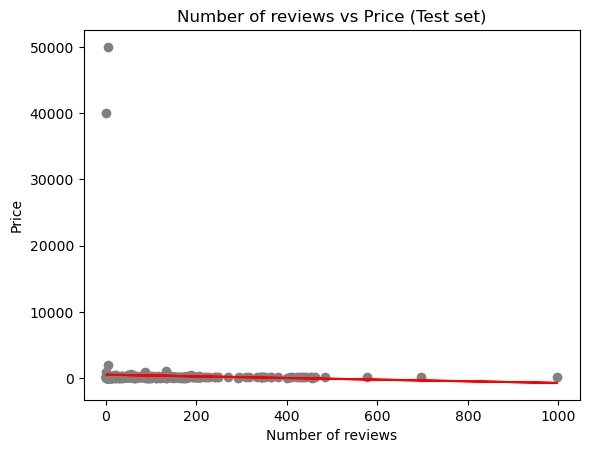

In [11]:
# Create plot

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.title('Number of reviews vs Price (Test set)')
plt.show()


In [12]:
# Performance metrics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Slope:", regression.coef_)
print("Mean squared error:", rmse)
print("R2 score:", r2)


Slope: [[-1.24917471]]
Mean squared error: 10718490.34015173
R2 score: 0.003086008192536016


In [13]:
# Compare actual vs predicted

comparison = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_predicted.flatten()
})

comparison.head(30)


,Actual,Predicted
0,181,253.036989
1,52,284.266357
2,103,-747.551955
3,162,415.429702
4,136,279.269658
5,116,389.197033
6,186,332.984171
7,90,364.213539
8,118,485.383486
9,115,359.216840


The regression model produced a negative slope (-1.25), indicating that as the number of reviews increases, the price of a listing tends to slightly decrease. This supports the initial hypothesis that listings with more reviews may be priced lower due to increased competition and market pressure.

However, the model’s R² score is extremely low (0.003), meaning that the number of reviews explains less than 1% of the variance in price. This shows that the linear model does not effectively explain or predict listing prices. Additionally, the mean squared error is very large, indicating that predicted prices are often far from the actual values. This is also visible in the comparison table, where predicted prices differ greatly from real prices.

Overall, this demonstrates that the relationship between number of reviews and price is very weak and that a simple linear regression model is not suitable for accurately predicting Airbnb prices using only this variable.

Bias, Limitations, and Model Weaknesses

This model has several important limitations:

Only one predictor variable was used, while Airbnb pricing is influenced by many other factors such as location, property type, amenities, seasonality, and availability.

The linear model assumes a straight-line relationship, but the data shows large variance and non-linear behavior, making a linear regression inappropriate.

The dataset may contain pricing outliers that further distort the regression line.

Using only review count may introduce selection bias, as newer listings naturally have fewer reviews regardless of price.

Because of these limitations, this model cannot be used reliably for real-world price prediction. A more accurate model would require multiple predictors and possibly non-linear regression techniques.